# Análisis del Conjunto de Datos de Precios de Aguacate

**Conjunto de Datos de Precios de Aguacate**: El conjunto de datos "Precios de Aguacate", obtenido de Kaggle, es un conjunto de datos ampliamente utilizado para proyectos de análisis de datos y aprendizaje automático. Proporciona datos históricos sobre precios y ventas de aguacates en varias regiones de los Estados Unidos. Este conjunto de datos es valioso para entender las tendencias en los precios de los aguacates, los volúmenes de ventas y su relación con diferentes factores.

## Atributos Clave

- **Columnas**: El conjunto de datos incluye varias columnas de información. Algunas de las columnas clave típicamente encontradas en este conjunto de datos incluyen:
    - **Fecha** (`Date`): La fecha de observación.
    - **Precio Promedio** (`AveragePrice`): El precio promedio de los aguacates.
    - **Volumen Total** (`Total Volume`): El volumen total de aguacates vendidos.
    - **4046**: Volumen de aguacates Hass pequeños vendidos.
    - **4225**: Volumen de aguacates Hass grandes vendidos.
    - **4770**: Volumen de aguacates Hass extra grandes vendidos.
    - **Bolsas Totales** (`Total Bags`): Total de bolsas de aguacates vendidas.
    - **Bolsas Pequeñas** (`Small Bags`): Bolsas de aguacates pequeños vendidas.
    - **Bolsas Grandes** (`Large Bags`): Bolsas de aguacates grandes vendidas.
    - **Bolsas Extra Grandes** (`XLarge Bags`): Bolsas de aguacates extra grandes vendidas.
    - **Tipo** (`Type`): El tipo de aguacates, generalmente categorizados como convencionales u orgánicos.
    - **Región** (`Region`): La región o ciudad dentro de los Estados Unidos donde se registraron los datos.

- **Rango de Fechas**: El conjunto de datos abarca un rango de fechas, lo que permite el análisis de series de tiempo. Puedes examinar cómo cambian los precios y ventas de aguacates a lo largo de diferentes estaciones y años.

- **Regiones**: Se proporciona información para varias regiones o ciudades a través de los Estados Unidos, lo que permite el análisis de variaciones de precios y ventas en diferentes mercados.

- **Tipos**: El conjunto de datos distingue entre diferentes tipos de aguacates, como convencionales y orgánicos, lo que puede ser útil para comparar tendencias de precios entre estas categorías.

- **Volumen**: Están disponibles datos sobre el volumen total de aguacates vendidos. Esta métrica de volumen se utiliza a menudo para analizar la demanda del mercado.

- **Precio Promedio**: El conjunto de datos contiene el precio promedio de los aguacates, una métrica fundamental para entender las tendencias de precios.

## Casos de Uso

- Este conjunto de datos se utiliza comúnmente para aprender y practicar el análisis de datos, visualización de datos y modelado de regresión en proyectos de ciencia de datos y aprendizaje automático.

- Sirve como un recurso valioso para entender cómo trabajar con datos del mundo real, extraer conocimientos y tomar decisiones basadas en datos.

---

## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.

1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.




4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

In [6]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.0 MB 20.2 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 18.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose   # para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido.

#Análisis de Series Temporales
import sys
import os

# IMPORTANTE - asegurarse de que el path es el correcto, tiene que apuntar a la carpeta Tools (o equivalente si se le cambia el nombre, debería ser Tools)
tools_path = os.path.abspath('./Tools')

# Comprobar si existe la carpeta Tools
if os.path.exists(tools_path):
    sys.path.append(tools_path)
else:
    print("The Tools directory does not exist. Please check the path.")
# importamos toolkit.py
try:
    from toolkit import procesar_datos_avocado
    from toolkit import regresion_modelos
    from toolkit import formatear_resultados
except ImportError as e:  # Catch ImportError para ver si hay errores al importar
    print(f"ImportError: {e}. comprueba que 'process_dataset' exista en 'toolkit.py'.")

df=procesar_datos_avocado('./avocado.csv','B')


df['Date'] = pd.to_datetime(df['Date'])

In [3]:
# Copia Dataframe

data_avo=df.copy() 

In [4]:
# Filtrar las filas con fechas inválidas (en caso de haber)
data_avo = data_avo.dropna(subset=['Date'])

In [5]:
# Visualizamos que los datos cargados aparezcan correctamente
data_avo.head()



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California


In [6]:
data_avo.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,11,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West


In [7]:
# Comprobar que la columna "Date" tiene el formato fecha
data_avo['Date'] = pd.to_datetime(data_avo['Date'])

data_avo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, 312 to 18236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    2704 non-null   int64         
 1   Date          2704 non-null   datetime64[ns]
 2   AveragePrice  2704 non-null   float64       
 3   Total Volume  2704 non-null   float64       
 4   4046          2704 non-null   float64       
 5   4225          2704 non-null   float64       
 6   4770          2704 non-null   float64       
 7   Total Bags    2704 non-null   float64       
 8   Small Bags    2704 non-null   float64       
 9   Large Bags    2704 non-null   float64       
 10  XLarge Bags   2704 non-null   float64       
 11  type          2704 non-null   object        
 12  year          2704 non-null   int64         
 13  region        2704 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 316.9+ KB


In [8]:
# Agrupar por fecha y sumar el volumen total
ventas_por_fecha = data_avo.groupby('Date')['Total Volume'].sum().reset_index()


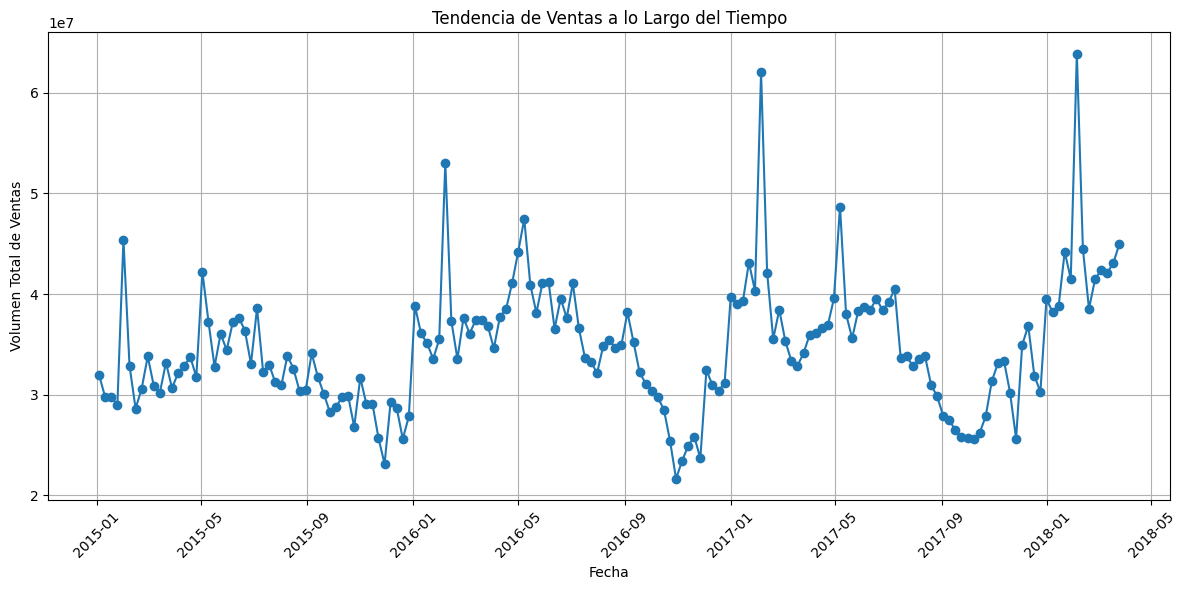

In [9]:
# Visualizar la tendencia de ventas a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_fecha['Date'], ventas_por_fecha['Total Volume'], marker='o')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Interpretación de los Resultados

La tendencia general de ventas de aguacates muestra un **ligero crecimiento a lo largo del tiempo**.

### Picos de Ventas
Cada año, en el mes de **febrero** se alcanza un pico máximo de ventas de aguacates. Después de este punto, las ventas se corrigen durante los primeros cinco meses, alcanzando un valor cercano al máximo nuevamente en el quinto mes. Al observar que estos picos ocurren consistentemente en el mismo periodo, es posible que exista un evento específico que impulse el consumo de aguacates de manera extraordinaria en febrero.

Una hipótesis probable es que este aumento en ventas podría estar relacionado con la **Super Bowl en Estados Unidos**, evento en el que el consumo de guacamole, y por ende de aguacates, tiende a aumentar significativamente.

### Valles de Ventas
También se observa que los **peores resultados en ventas** se concentran en los últimos tres meses de cada año. Estos "valles" en el volumen total de ventas reflejan los puntos más bajos y se repiten de manera constante en este periodo. Esto podría estar relacionado con una disminución en la demanda de los consumidores o con la finalización de la temporada de cosecha del aguacate, lo que afecta la oferta disponible en el mercado.

### Estacionalidad en los Datos
Dado que tanto los picos como los valles de ventas se presentan en los mismos periodos año tras año, se puede afirmar que hay **estacionalidad en los datos**. Algunos ejemplos específicos de esta estacionalidad son:
- **Meses de verano**: Durante esta temporada, se percibe una tendencia al alza en las ventas, aunque sin alcanzar el pico máximo observado en febrero.
- **Septiembre a Diciembre**: Este periodo muestra consistentemente los valores de ventas más bajos en cada año, lo que podría explicarse por una reducción en la demanda por parte de los consumidores, junto con el fin de la época de cosecha.






5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

In [10]:
# Extraer el año de la columna 'Date'
data_avo['year'] = data_avo['Date'].dt.year

In [11]:
# Agrupar por año y calcular el promedio de precios
precios_anuales = data_avo.groupby('year')['AveragePrice'].mean().reset_index()


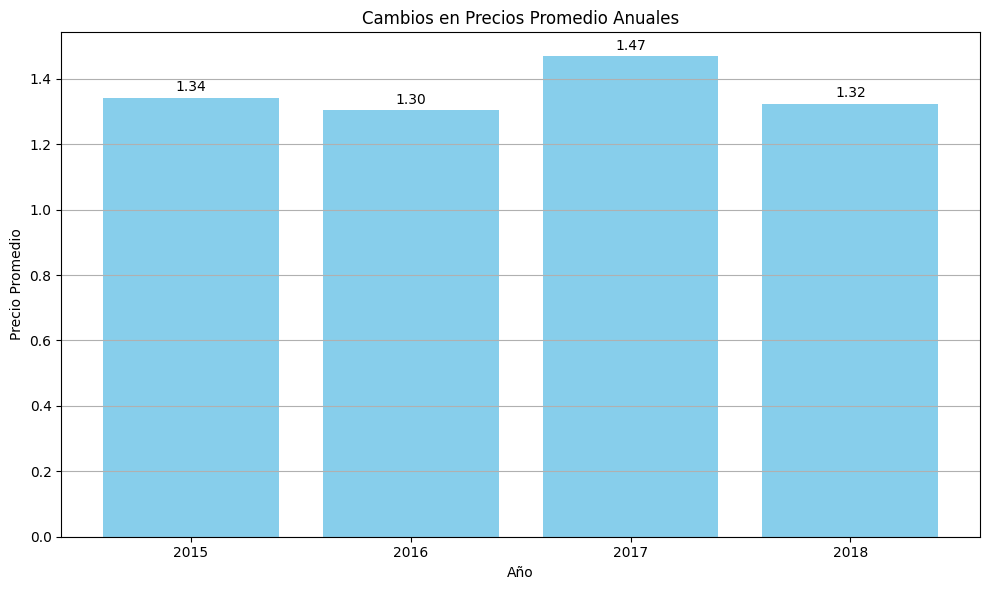

In [12]:
# Visualizar los cambios en precios anuales
plt.figure(figsize=(10, 6))
plt.bar(precios_anuales['year'], precios_anuales['AveragePrice'], color='skyblue')
plt.title('Cambios en Precios Promedio Anuales')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.xticks(precios_anuales['year'])
plt.grid(axis='y')

# Añadir el precio como etiqueta en cada barra
for i, v in enumerate(precios_anuales['AveragePrice']):
    plt.text(precios_anuales['year'][i], v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

# Análisis de los Cambios en los Precios Promedio Anuales de Aguacates (2015-2018)

Al observar cómo han cambiado los precios promedio de los aguacates entre 2015 y 2018, podemos aprender cómo entender los datos y qué factores pueden estar detrás de las fluctuaciones de precios en productos agrícolas. Este análisis puede ayudar a practicar técnicas básicas de visualización y sacar conclusiones, aunque simples, sobre los datos.

## 1. Patrón General de Precios
Al hacer un análisis año por año, se ven algunos patrones interesantes:
- **2015 y 2016**: En estos dos años, el precio promedio anual del aguacate se mantuvo bastante estable, alrededor de $1.34-$1.38. Esta estabilidad puede deberse a una situación equilibrada entre la oferta (cuántos aguacates están disponibles en el mercado) y la demanda (cuánta gente quiere comprarlos).
- **2017**: Este año muestra un cambio notable, con el precio promedio subiendo a $1.52. Un aumento como este podría indicar que hubo una menor oferta (quizás debido a problemas en las cosechas), un aumento en la demanda o ambos.
- **2018**: Después del aumento en 2017, el precio promedio baja ligeramente a $1.35. Esto podría ser un ajuste donde la oferta del mercado volvió a satisfacer la demanda de manera más eficiente.

## 2. Factores que Podrían Afectar el Precio
Para entender por qué los precios pueden subir o bajar, es importante considerar algunos factores comunes:
- **Oferta y Demanda**: Si el aguacate se hace más popular (como ha sucedido en Estados Unidos y Europa), la demanda sube, y esto puede aumentar los precios, especialmente si la oferta no crece al mismo ritmo.
- **Clima y Agricultura**: Factores como el clima o enfermedades en los cultivos pueden afectar cuántos aguacates se producen. Si un año tiene sequías o inundaciones, la producción baja y el precio puede subir.
- **Ciclos de Producción**: Los aguacates pueden tener años buenos y malos debido a factores naturales. Estos ciclos afectan el precio si las cosechas son muy distintas de un año a otro.







### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.

In [13]:
# 2.3 Histograma

In [14]:
# Sumar volúmenes de ventas por tipo de bolsa
total_bags = data_avo['Total Bags'].sum()
small_bags = data_avo['Small Bags'].sum()
large_bags = data_avo['Large Bags'].sum()
xlarge_bags = data_avo['XLarge Bags'].sum()

In [15]:
# Crear una lista de tipos de bolsas y sus respectivas ventas
tipos_bolsas = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
ventas = [total_bags, small_bags, large_bags, xlarge_bags]

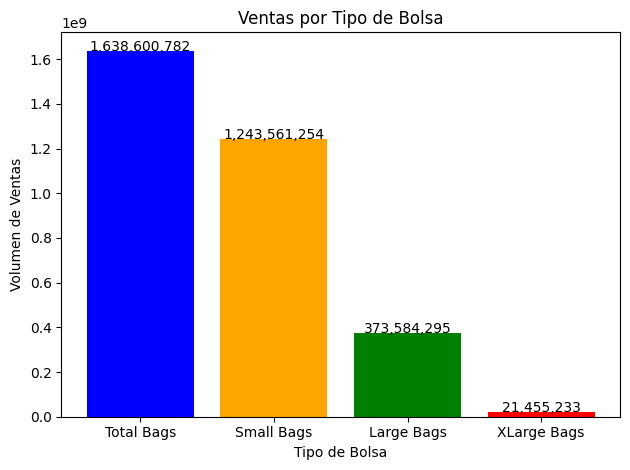

In [16]:
# Crear el gráfico de barras
plt.bar(tipos_bolsas, ventas, color=['blue', 'orange', 'green', 'red'])
plt.title('Ventas por Tipo de Bolsa')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Volumen de Ventas')

# Añadimos etiqueta para los valores exactos de cada tipo de bolsa
for i, v in enumerate(ventas):
    plt.text(i, v + 50, f'{v:,.0f}', color='black', ha='center')

# Mostrar el gráfico

plt.tight_layout()
plt.show()

In [17]:
# 5. Gráfico de Lineas Promedio por año

In [18]:
# Agrupar por año y calcular el precio promedio
average_prices = data_avo.groupby('year')['AveragePrice'].mean().reset_index()

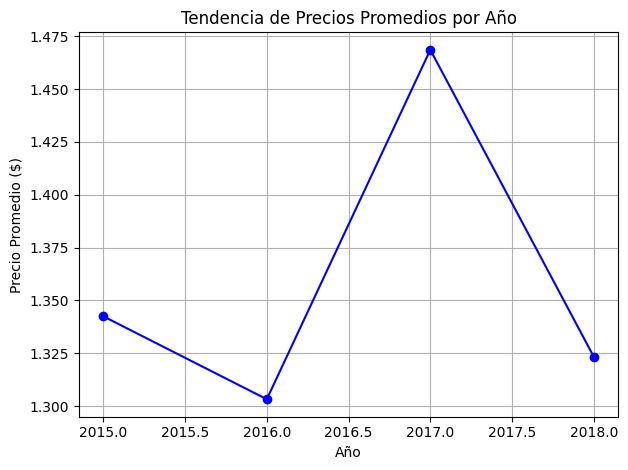

In [19]:
# Crear el gráfico de líneas
plt.plot(average_prices['year'], average_prices['AveragePrice'], marker='o', color='b', linestyle='-')

# Añadir título y etiquetas
plt.title('Tendencia de Precios Promedios por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio ($)')
plt.grid()  # Añadir una cuadrícula para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.

2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.

3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.

4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.

5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.

In [20]:
#3 Elasticidad a Nivel de Tipo de Bolsa

In [21]:
# Configuraciones
bolsas = ['Small Bags', 'Large Bags', 'XLarge Bags']
elasticidades_bolsas = {}
umbral = 0.1  # Umbral para filtrar valores cercanos a cero

# Iteramos sobre cada tipo de bolsa
for bolsa in bolsas:
    vol_bolsas = data_avo.groupby('Date')[bolsa].sum()
    precios = data_avo.groupby('Date')['AveragePrice'].mean()
    
    # Suavización mediante un promedio móvil de 4 semanas
    vol_bolsas_suavizado = vol_bolsas.rolling(window=4).mean().dropna()
    precios_suavizado = precios.rolling(window=4).mean().dropna()
    
    # Filtrar valores bajos para evitar divisiones por números pequeños
    vol_bolsas_suavizado = vol_bolsas_suavizado[vol_bolsas_suavizado > umbral]
    precios_suavizado = precios_suavizado[precios_suavizado > umbral]
    
    # Cambios porcentuales
    pct_cambio_vol = vol_bolsas_suavizado.pct_change().dropna()
    pct_cambio_precio = precios_suavizado.pct_change().dropna()
    
    # Alineamos índices
    common_index = pct_cambio_vol.index.intersection(pct_cambio_precio.index)
    pct_cambio_vol = pct_cambio_vol[common_index]
    pct_cambio_precio = pct_cambio_precio[common_index]
    
    # Elasticidad
    elasticidad = pct_cambio_vol / pct_cambio_precio.replace(0, 1e-6)
    
    # Filtrar elasticidades extremas
    elasticidad = elasticidad[(elasticidad > -10) & (elasticidad < 10)]
    
    # Guardamos el promedio de elasticidad
    elasticidades_bolsas[bolsa] = elasticidad.mean()





Promedio de Elasticidad Precio-Demanda por Tipo de Bolsa:
Small Bags: -1.4862
Large Bags: -1.7440
XLarge Bags: -0.2811


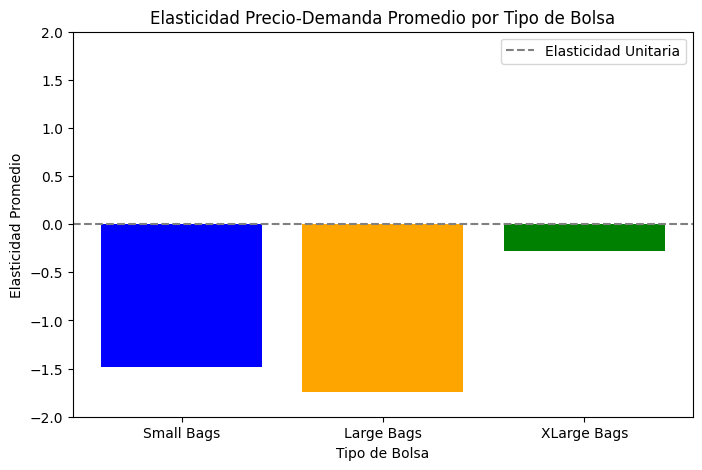

In [22]:
# Imprimir los resultados de elasticidad promedio
print("\nPromedio de Elasticidad Precio-Demanda por Tipo de Bolsa:")
for bolsa, elasticidad in elasticidades_bolsas.items():
    print(f"{bolsa}: {elasticidad:.4f}")

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(elasticidades_bolsas.keys(), elasticidades_bolsas.values(), color=['blue', 'orange', 'green'])
plt.title("Elasticidad Precio-Demanda Promedio por Tipo de Bolsa")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Elasticidad Promedio")
plt.ylim(-2, 2)
plt.axhline(0, color='grey', linestyle='--', label="Elasticidad Unitaria")
plt.legend()
plt.show()

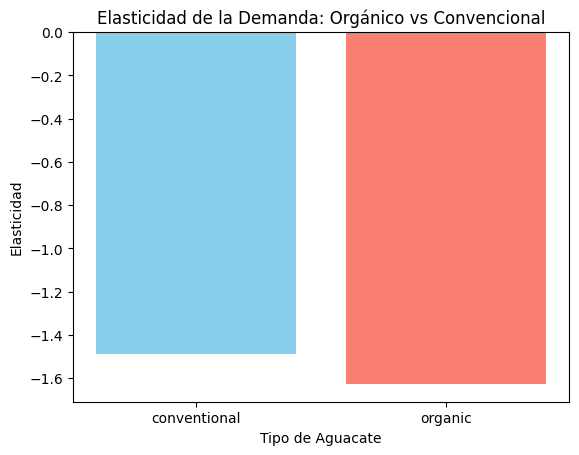

In [32]:
# Crear diccionario para almacenar los resultados de elasticidad
elasticidad_tipo = {}

# Analizar elasticidad para cada tipo de aguacate (orgánico y convencional)
for tipo in data_avo['type'].unique():
    # Filtrar los datos para el tipo de aguacate
    data_tipo = data_avo[data_avo['type'] == tipo]
    
    # Agrupar por fecha y calcular el volumen total y el precio promedio
    volumen_diario = data_tipo.groupby('Date')['Total Volume'].sum()
    precio_promedio_diario = data_tipo.groupby('Date')['AveragePrice'].mean()
    
    # Calcular cambio porcentual y eliminar valores nulos
    cambio_volumen = volumen_diario.pct_change().dropna()
    cambio_precio = precio_promedio_diario.pct_change().dropna().replace(0, np.nan)
    
    # Filtrar cambios extremos para evitar valores atípicos
    cambio_volumen = cambio_volumen[(cambio_volumen > -1) & (cambio_volumen < 1)]
    cambio_precio = cambio_precio[(cambio_precio > -1) & (cambio_precio < 1)]
    
    # Chequear si hay suficientes datos para evitar errores de división o series vacías
    if cambio_volumen.empty or cambio_precio.empty:
        print(f"No hay datos suficientes para calcular elasticidad para el tipo: {tipo}")
        continue  # Saltar si faltan datos
    
    # Calcular elasticidad como el mediana de los cambios en volumen dividido por los cambios en precio
    elasticidad = (cambio_volumen / cambio_precio).median()
    elasticidad_tipo[tipo] = elasticidad  # Guardar el resultado

# Verificar si el diccionario tiene datos antes de graficar
if elasticidad_tipo:
    # Graficar la elasticidad
    plt.bar(elasticidad_tipo.keys(), elasticidad_tipo.values(), color=['skyblue', 'salmon'])
    plt.title("Elasticidad de la Demanda: Orgánico vs Convencional")
    plt.xlabel("Tipo de Aguacate")
    plt.ylabel("Elasticidad")
    plt.show()
else:
    print("No se encontraron datos suficientes para graficar elasticidades.")



In [ ]:
# 3.5

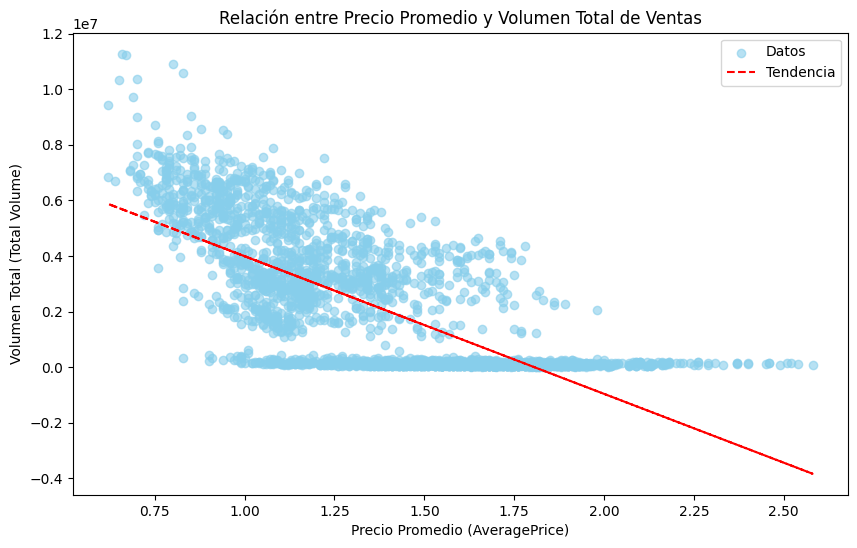

Elasticidad Precio-Ventas Promedio: nan


c:\Users\clarg\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [ ]:
# Calcular el cambio porcentual en precio promedio y volumen total
cambio_precio = data_avo['AveragePrice'].pct_change()
cambio_volumen = data_avo['Total Volume'].pct_change()

# Calcular elasticidad como el cambio en volumen dividido por el cambio en precio
elasticidad = cambio_volumen / cambio_precio

# Gráfico de dispersión entre precio promedio y volumen total
plt.figure(figsize=(10, 6))
plt.scatter(data_avo['AveragePrice'], data_avo['Total Volume'], color='skyblue', alpha=0.6, label="Datos")
plt.title("Relación entre Precio Promedio y Volumen Total de Ventas")
plt.xlabel("Precio Promedio (AveragePrice)")
plt.ylabel("Volumen Total (Total Volume)")

# Agregar una línea de tendencia
z = np.polyfit(data_avo['AveragePrice'].dropna(), data_avo['Total Volume'].dropna(), 1) 
p = np.poly1d(z)
plt.plot(data_avo['AveragePrice'], p(data_avo['AveragePrice']), "r--", label="Tendencia")

plt.legend()
plt.show()

# Calcular y mostrar elasticidad promedio
elasticidad_promedio = elasticidad.mean()
print(f"Elasticidad Precio-Ventas Promedio: {elasticidad_promedio:.2f}")



### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.

2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.

3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.

4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.

5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.

In [25]:
# 3 Análisis de Cohortes en Función del Tipo de Bolsa:

In [26]:
# Crear un DataFrame para las ventas totales por tipo de bolsa
bag_sales = data_avo[['Date', 'Small Bags', 'Large Bags', 'XLarge Bags']].groupby('Date').sum()


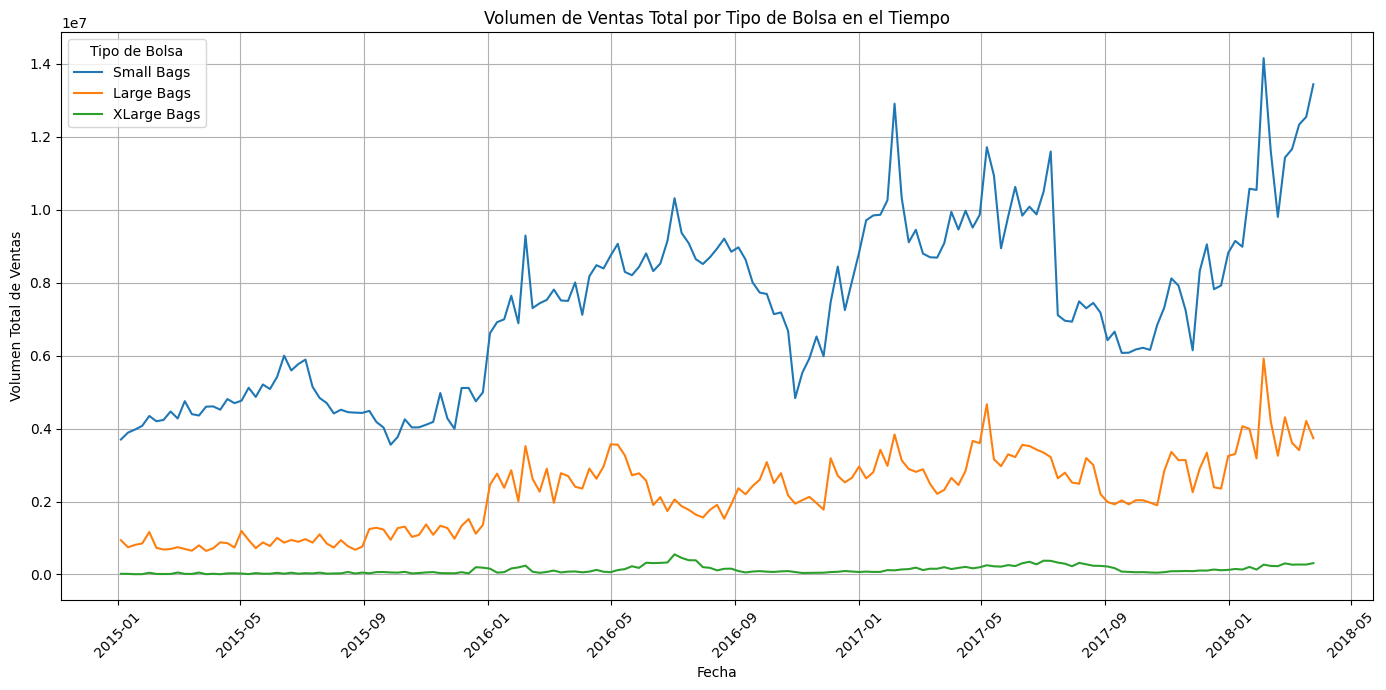

In [27]:
# Graficar el volumen total de ventas para cada tipo de bolsa
plt.figure(figsize=(14, 7))
for bag_type in ['Small Bags', 'Large Bags', 'XLarge Bags']:
    plt.plot(bag_sales.index, bag_sales[bag_type], label=bag_type)

# Configuración del gráfico
plt.title("Volumen de Ventas Total por Tipo de Bolsa en el Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Volumen Total de Ventas")
plt.legend(title="Tipo de Bolsa")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Interpretacion para posibles modelos de regresión

In [28]:
# 4 


In [29]:
# 5

In [35]:
# Asegurarse de que 'Date' está en formato datetime
if not pd.api.types.is_datetime64_any_dtype(data_avo['Date']):
    data_avo['Date'] = pd.to_datetime(data_avo['Date'])

# Verificar la columna 'Date' después de la conversión
print("Verificación de la columna Date (debería estar en formato datetime):")
print(data_avo['Date'].head())
print(data_avo['Date'].dtype)

# Crear la columna 'Mes' a partir de 'Date' en formato periodo mensual
data_avo['Mes'] = data_avo['Date'].dt.to_period('M')

# Imprimir para verificar que 'Mes' se creó correctamente
print("Verificación de la columna Mes (debería mostrar el año y mes):")
print(data_avo[['Date', 'Mes']].head())

# Ahora procedemos con el cálculo de ventas mensuales
# Agrupar por 'Mes' y calcular el volumen total de ventas mensual
ventas_mensuales = data_avo.groupby(['Mes'])['Total Volume'].sum().reset_index()

# Verificar que ventas_mensuales se ha creado correctamente
print("Verificación de ventas mensuales agrupadas por Mes:")
print(ventas_mensuales.head())



Verificación de la columna Date (debería estar en formato datetime):
312   2015-12-27
313   2015-12-20
314   2015-12-13
315   2015-12-06
316   2015-11-29
Name: Date, dtype: datetime64[ns]
datetime64[ns]
Verificación de la columna Mes (debería mostrar el año y mes):
          Date      Mes
312 2015-12-27  2015-12
313 2015-12-20  2015-12
314 2015-12-13  2015-12
315 2015-12-06  2015-12
316 2015-11-29  2015-11
Verificación de ventas mensuales agrupadas por Mes:
       Mes  Total Volume
0  2015-01  1.204535e+08
1  2015-02  1.375034e+08
2  2015-03  1.587573e+08
3  2015-04  1.305525e+08
4  2015-05  1.827522e+08


Verificación de columnas 'Mes' y 'Cohorte':
          Date      Mes  Cohorte
312 2015-12-27  2015-12  2015-12
313 2015-12-20  2015-12  2015-12
314 2015-12-13  2015-12  2015-12
315 2015-12-06  2015-12  2015-12
316 2015-11-29  2015-11  2015-11
317 2015-11-22  2015-11  2015-11
318 2015-11-15  2015-11  2015-11
319 2015-11-08  2015-11  2015-11
320 2015-11-01  2015-11  2015-11
321 2015-10-25  2015-10  2015-10

Valores nulos en 'Total Volume': 0
Valores cero en 'Total Volume': 0

Datos agrupados por 'Cohorte' y 'Mes':
   Cohorte      Mes  Total Volume
0  2015-01  2015-01  1.204535e+08
1  2015-02  2015-02  1.375034e+08
2  2015-03  2015-03  1.587573e+08
3  2015-04  2015-04  1.305525e+08
4  2015-05  2015-05  1.827522e+08
5  2015-06  2015-06  1.443041e+08
6  2015-07  2015-07  1.350889e+08
7  2015-08  2015-08  1.581918e+08
8  2015-09  2015-09  1.242578e+08
9  2015-10  2015-10  1.152311e+08

Datos de 'cohorte_ventas' con 'Meses desde Cohorte':
   Cohorte      Mes  Meses desde Cohorte
0  2015-01  20

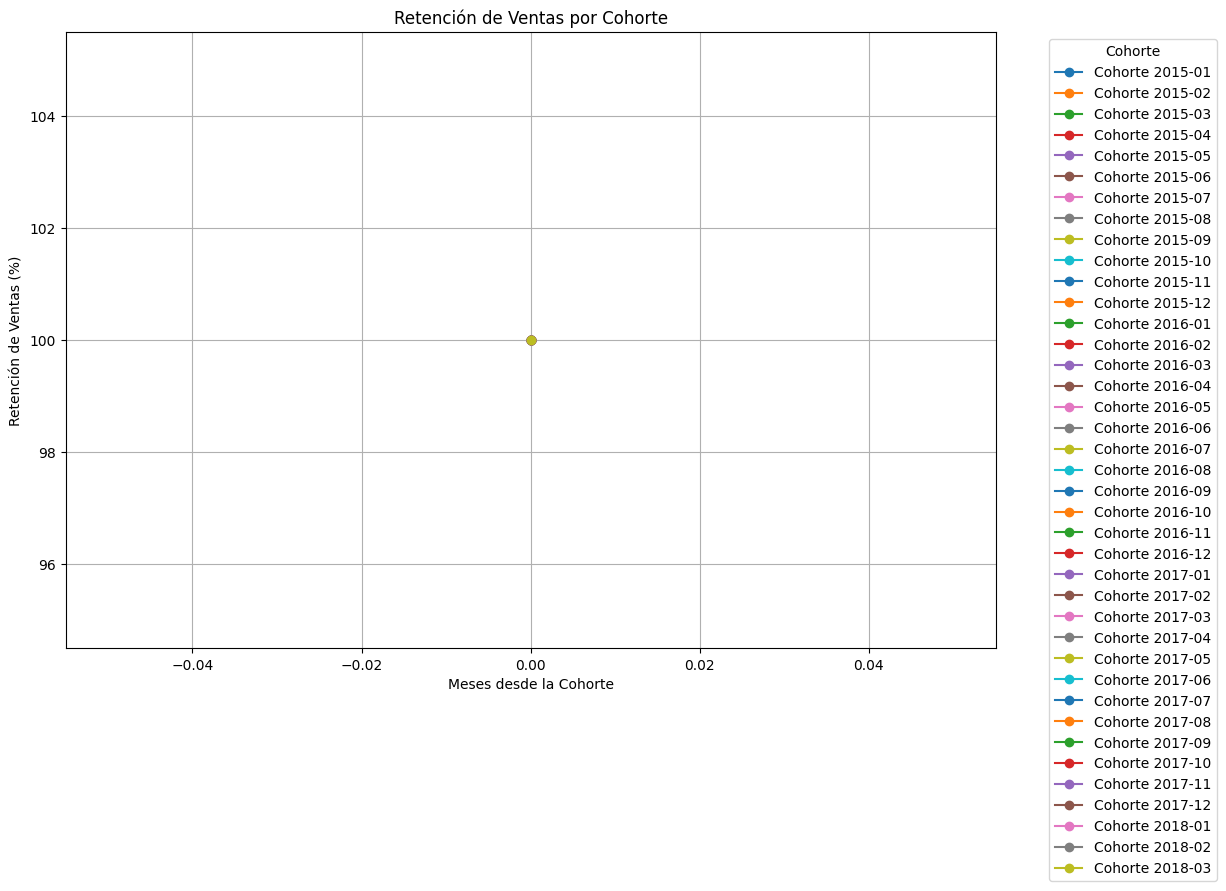

In [39]:
# Paso 1: Crear columna 'Mes' a partir de 'Date', en formato de período mensual
data_avo['Mes'] = data_avo['Date'].dt.to_period('M')

# Paso 2: Definir la cohorte (primer mes de venta) para cada grupo de 'Mes'
data_avo['Cohorte'] = data_avo.groupby('Mes')['Date'].transform('min').dt.to_period('M')

# Verificación de columnas 'Mes' y 'Cohorte'
print("Verificación de columnas 'Mes' y 'Cohorte':")
print(data_avo[['Date', 'Mes', 'Cohorte']].head(10))  # Muestra las primeras 10 filas para revisión

# Verificar si 'Total Volume' tiene valores nulos o ceros
print("\nValores nulos en 'Total Volume':", data_avo['Total Volume'].isnull().sum())
print("Valores cero en 'Total Volume':", (data_avo['Total Volume'] == 0).sum())

# Paso 3: Agrupar por 'Cohorte' y 'Mes' para calcular el volumen total de ventas por cohorte
cohorte_ventas = data_avo.groupby(['Cohorte', 'Mes'])['Total Volume'].sum().reset_index()

# Verificación del DataFrame 'cohorte_ventas' después del agrupamiento
print("\nDatos agrupados por 'Cohorte' y 'Mes':")
print(cohorte_ventas.head(10))

# Paso 4: Calcular los meses desde el inicio de la cohorte
cohorte_ventas['Meses desde Cohorte'] = (cohorte_ventas['Mes'] - cohorte_ventas['Cohorte']).apply(lambda x: x.n)

# Verificación de la columna 'Meses desde Cohorte'
print("\nDatos de 'cohorte_ventas' con 'Meses desde Cohorte':")
print(cohorte_ventas[['Cohorte', 'Mes', 'Meses desde Cohorte']].head(10))

# Paso 5: Pivotar la tabla para tener las cohortes en filas y los meses en columnas
cohorte_pivot = cohorte_ventas.pivot_table(index='Cohorte', columns='Meses desde Cohorte', values='Total Volume')

# Paso 6: Normalizar para que el primer mes sea 100%
cohorte_retencion = cohorte_pivot.divide(cohorte_pivot.iloc[:, 0], axis=0) * 100

# Verificación de 'cohorte_retencion' para asegurarse de que no contiene solo NaNs
print("\nDatos de 'cohorte_retencion':")
print(cohorte_retencion.head(10))

# Visualización de la retención de ventas por cohorte
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, row in cohorte_retencion.iterrows():
    plt.plot(row.index, row.values, marker='o', label=f'Cohorte {i}')

# Personalización del gráfico
plt.title("Retención de Ventas por Cohorte")
plt.xlabel("Meses desde la Cohorte")
plt.ylabel("Retención de Ventas (%)")
plt.legend(title="Cohorte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()





### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.